## Digit Recognition Demo Notebook  
##### Author: Bledar Blake Zenuni - May 2025  


A. For demonstration purposes only, inspired by the Oxford AI Programme 2025 (which I highly recommend!) -- no copyright materials or modules are shared.

B. This notebook demonstrates a simple artificial neural network (ANN) built to recognise handwritten digits using a standard dataset.

C. Challenges discussed in the accompanying essay are drawn from reflecting on my own handwriting; the implementation here uses publicly available data for reproducibility and technical demonstration.

---

#### 1 - Importing Python Libs, Loading and Visualizing Sample Digits

In [28]:
# importing libs
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix as YBConfusionMatrix
# ignore warnings (useful for the iterations of the model loss curve later in this notebook)
import warnings
from sklearn.exceptions import ConvergenceWarning


Data shape: (1797, 64)
Target shape: (1797,)


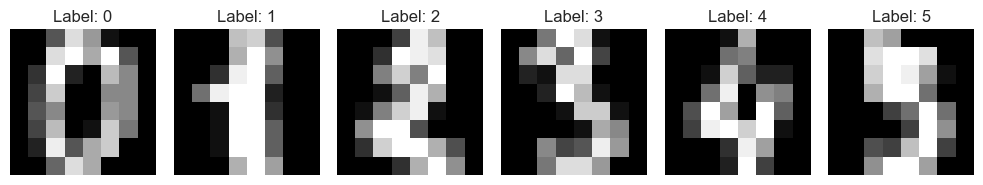

In [22]:
#load and visualise sample digits
digits = load_digits()

# see dataset shape
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

# plotting first 6 images
fig, axes = plt.subplots(1, 6, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

- Sample digits show structure and consistent spacing; this is useful for training but less representative of real handwriting variability  

- This lets the model learn basic visual features like loops, straight lines, and stroke angles  

---


#### 2 - Preprocessing Data and Creating Train-Test Split

In [23]:
# preprocess data and create train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# flatten image data and scale to [0, 1]
X = digits.data
y = digits.target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Training samples: 1437
Test samples: 360


- This is "feature scaling" and it ensures uniform input for the network, reducing bias from pixel intensity variation  

- We tried to generate a clean train-test split to allow us to evaluate the model’s ability to generalise; this is a core concern when handling messy handwriting; reflecting on my own handwritting (Question 1), this is a concern sometimes also when I scribble digits down quickly  

- Lastly, preprocessing is critical for addressing variation and inconsistency, key challenges highlighted in the assignment  

---


#### 3 - Defining and Training a Simple ANN Model

In [24]:
# define and train a simple ANN model
model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', 
                      max_iter=300, random_state=42)
# trains
model.fit(X_train, y_train)

# outputs that training is complete
print("Model training complete.")


Model training complete.


- This model should have (behind the scenes) a single hidden layer with ReLU activation that captures non-linear patterns in the digit images  

- It then learns internal weights to distinguish visual differences between digits, such as loops and angles  

- Though the training completes in seconds, the learning reflects core ANN principles discussed in Questions 2 and 3.  



Nota Bene (NB): Since the model was trained with ```verbose=false``` we can still access it by plotting the loss curve after training:

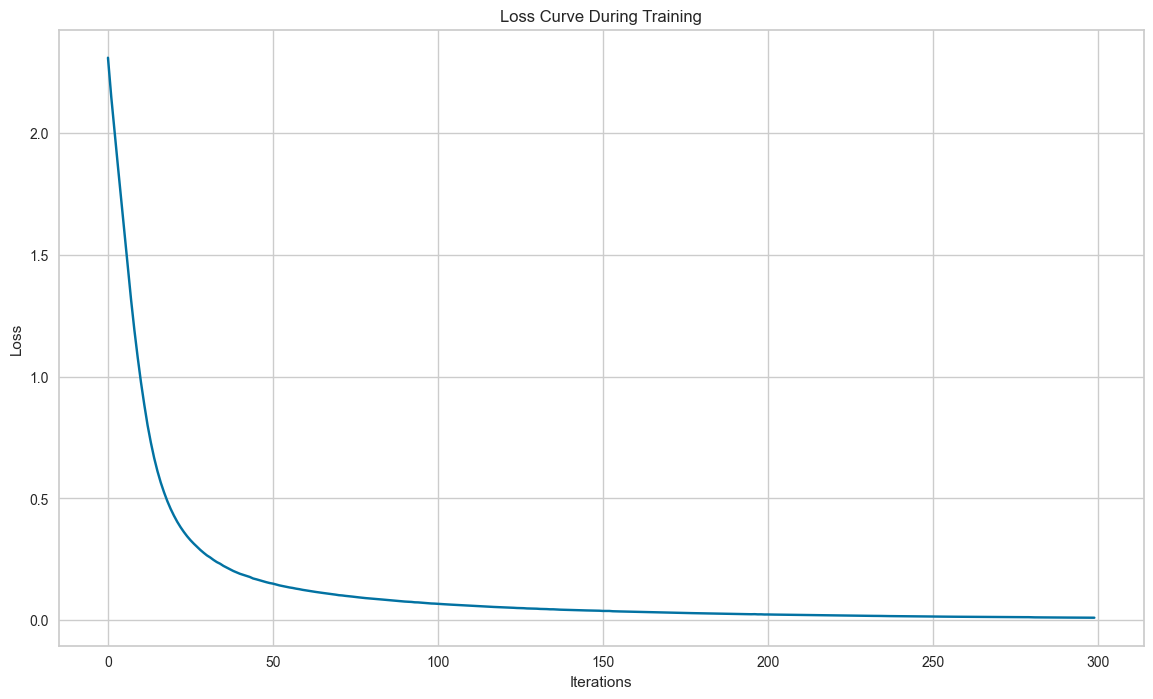

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(model.loss_curve_)
plt.title("Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

- Loss curve shows us rapid initial improvement, followed by convergence
- It indicates the model successfully learned meaningful patterns and minimised error over time


NB: To see more during training, we enabled ```verbose```but this gave many pages of iterations; so used the ```warm_start``` parameter instead -- we should see the model improve after each iteration:

In [26]:
# suppress only ConvergenceWarning from scikit-learn
warnings.filterwarnings("ignore", category=ConvergenceWarning)


model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam',
                      max_iter=1, random_state=42, warm_start=True)

n_epochs = 300
print_intervals = set([1, 2, 3, 4, 5, 25, 50, 75, 100, 200, 300])

for epoch in range(1, n_epochs + 1):
    model.fit(X_train, y_train)
    if epoch in print_intervals:
        print(f"Iteration {epoch}, loss: {model.loss_:.4f}")

Iteration 1, loss: 2.3092
Iteration 2, loss: 2.1440
Iteration 3, loss: 1.9914
Iteration 4, loss: 1.8424
Iteration 5, loss: 1.6940
Iteration 25, loss: 0.2749
Iteration 50, loss: 0.1031
Iteration 75, loss: 0.0568
Iteration 100, loss: 0.0348
Iteration 200, loss: 0.0064
Iteration 300, loss: 0.0029


---

#### 4 - Evaluating the Model on Test Set

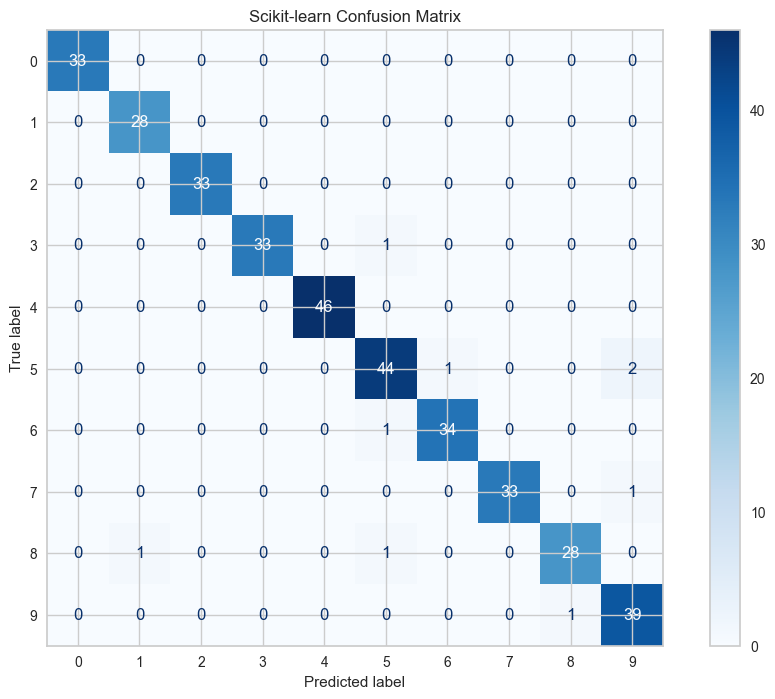

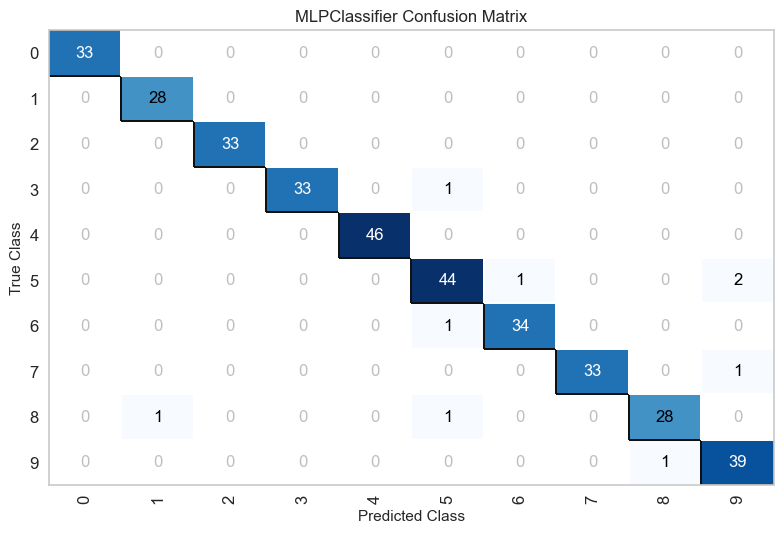

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
y_pred = model.predict(X_test)
# sklearn version - confusion matrix to evaluate
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.title("Scikit-learn Confusion Matrix")
plt.show()

# yellowbrick version (annotated, precision/recall included)
yb_cm = YBConfusionMatrix(model, classes=digits.target_names, cmap='Blues')
yb_cm.fit(X_train, y_train)
yb_cm.score(X_test, y_test)
yb_cm.show()

- The Scikit-learn version gives control over layout and aesthetics

- The Yellowbrick matrix, developed by faculty at Georgetown, (from whom I learned data science) adds precision/recall support and integrates smoothly with scikit-learn models — helpful for interpretability in academic and production settings

- Both the scikit-learn and Yellowbrick confusion matrices show strong diagonal dominance, indicating high classification accuracy across all digits.

- Misclassifications are minimal and mostly isolated — e.g., occasional confusion between 5 and 6 or 8 and 9, likely due to shared curvature and loop structure.

- Yellowbrick adds clarity by integrating precision/recall metrics, enhancing interpretability — particularly useful when evaluating how well the model handles digits with similar strokes.



---

#### 5 - Closing Down the Pub

This notebook illustrated a simple ANN’s ability to learn patterns from handwritten digits; instead of intuition (which is what is built into us humans), the machine needs to recognize it through iteration. 

The model improved by seeing its own error and adjusting with each pass.

The loss curve, like a learner’s arc, bent toward clarity. Each confusion matrix showed not perfection, but progress.

In the spirit of Condorcet, learning is not a leap but a series of steps. And like Locke’s blank slate, the model began knowing nothing; yet over many interations it came to recognise form, loop, and line. 

Not to say that we can extrapolate to all ANNs from this, but in this case these are both the advantanges and the weaknesses of this simple Artificial Neural Nets.


---  
